In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.base import clone

from utils import custom_score, load_data

In [2]:
X_train = load_data('x_train.txt')
y_train = load_data('y_train.txt')

X = X_train.to_numpy()
y = y_train[0].to_numpy()

In [32]:
def kbest_feature_selection(X, y, base_model, n_features=range(1, 21), n_splits=5, score_func=f_classif):
    best_score = 0
    best_k = None

    for num_features in n_features:
        kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = []
        accs = []

        for train_idx, val_idx in kf.split(X, y):    
            X_cv, X_val = X[train_idx], X[val_idx]
            y_cv, y_val = y[train_idx], y[val_idx]

            pipeline = Pipeline([
                ('select', SelectKBest(score_func=score_func, k=num_features)),
                ('scale', StandardScaler()),
                ('clf', clone(base_model))
            ])
            
            pipeline.fit(X_cv, y_cv)
            y_val_prob = pipeline.predict_proba(X_val)[:, 1]
            
            score = custom_score(y_val, y_val_prob, num_features)
            scores.append(score)

            accuracy = accuracy_score(y_val, np.round(y_val_prob))
            accs.append(accuracy)

        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_k = num_features

        print(f"N features = {num_features}, Custom CV score: {avg_score:.2f} +/- {np.std(scores):.2f}, Accuracy: {np.mean(accs):.2f} +/- {np.std(accs):.2f}")
    
    selector = SelectKBest(score_func=score_func, k=best_k)
    selector.fit(X, y)
    best_features = selector.get_support(indices=True)

    return best_features, best_score

In [33]:
score_func = f_classif
print("Method:", repr(score_func), "\n")    

selected_features, best_cv_score = kbest_feature_selection(
    X, y,
    base_model=LogisticRegression(),
    score_func=score_func
)

print(f"\nFinal selected features: {selected_features}")
print(f"Best CV score: {best_cv_score:.2f}")

Method: <function f_classif at 0x7faee3a61f80> 

N features = 1, Custom CV score: 7050.00 +/- 331.66, Accuracy: 0.71 +/- 0.01
N features = 2, Custom CV score: 6850.00 +/- 364.69, Accuracy: 0.71 +/- 0.01
N features = 3, Custom CV score: 6660.00 +/- 367.97, Accuracy: 0.71 +/- 0.01
N features = 4, Custom CV score: 6460.00 +/- 392.94, Accuracy: 0.71 +/- 0.01
N features = 5, Custom CV score: 6260.00 +/- 377.36, Accuracy: 0.72 +/- 0.01
N features = 6, Custom CV score: 6100.00 +/- 380.79, Accuracy: 0.71 +/- 0.01
N features = 7, Custom CV score: 5880.00 +/- 331.06, Accuracy: 0.72 +/- 0.01
N features = 8, Custom CV score: 5700.00 +/- 314.64, Accuracy: 0.72 +/- 0.01
N features = 9, Custom CV score: 5490.00 +/- 281.78, Accuracy: 0.72 +/- 0.01
N features = 10, Custom CV score: 5290.00 +/- 310.48, Accuracy: 0.72 +/- 0.01
N features = 11, Custom CV score: 5060.00 +/- 287.05, Accuracy: 0.72 +/- 0.01
N features = 12, Custom CV score: 4870.00 +/- 274.95, Accuracy: 0.72 +/- 0.01
N features = 13, Custom 

In [ ]:
# as in all other tests, it can be seen that a lot of features does not help, thus we will test only up to 3 features

In [63]:
n_features = [1,2,3]
for k in n_features:
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    features_k = selector.get_support(indices=True)
    print(f"N features = {k}, Features = {features_k}")

N features = 1, Features = [2]
N features = 2, Features = [2 3]
N features = 3, Features = [2 3 6]


In [36]:
n_features = [1,2,3]
for k in n_features:
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X, y)
    features_k = selector.get_support(indices=True)
    print(f"N features = {k}, Features = {features_k}")

N features = 1, Features = [2]
N features = 2, Features = [2 6]
N features = 3, Features = [2 3 6]


In [ ]:
# both methods give the same features

### Tests - grid search

In [ ]:
from grid_search import *

In [ ]:
X_test = load_data('x_test.txt')
X_test = X_test.to_numpy()

#### features = [2]

Testing: Logistic Regression


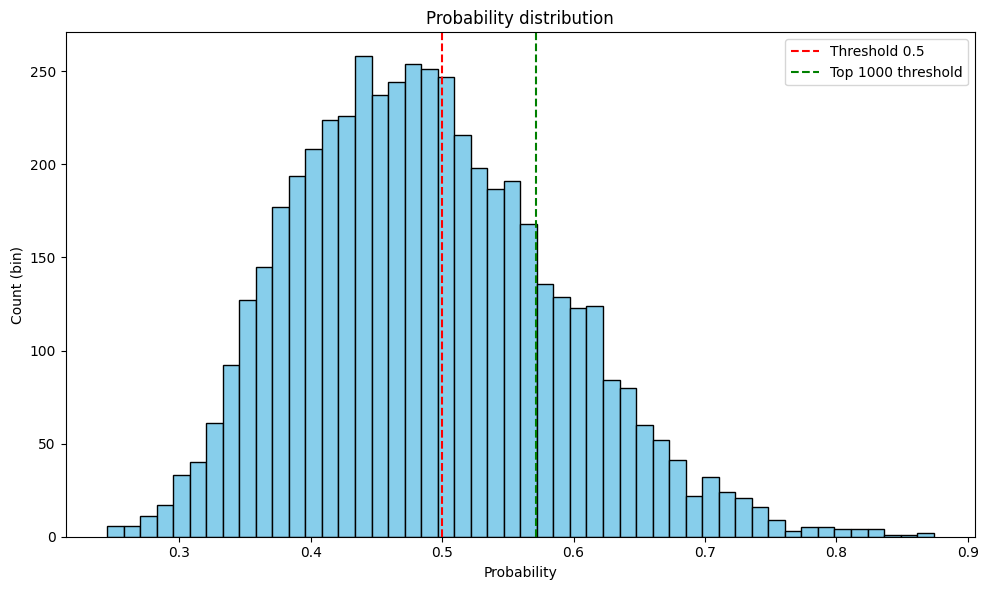

Logistic Regression: 7050.0000
   Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

   Metrics: {'score': np.float64(7080.0), 'acc_top': np.float64(0.728), 'acc_global': np.float64(0.6982), 'logloss_top': 0.6135260932425574, 'logloss_global': 0.6392991360417783}

Testing: Random Forest


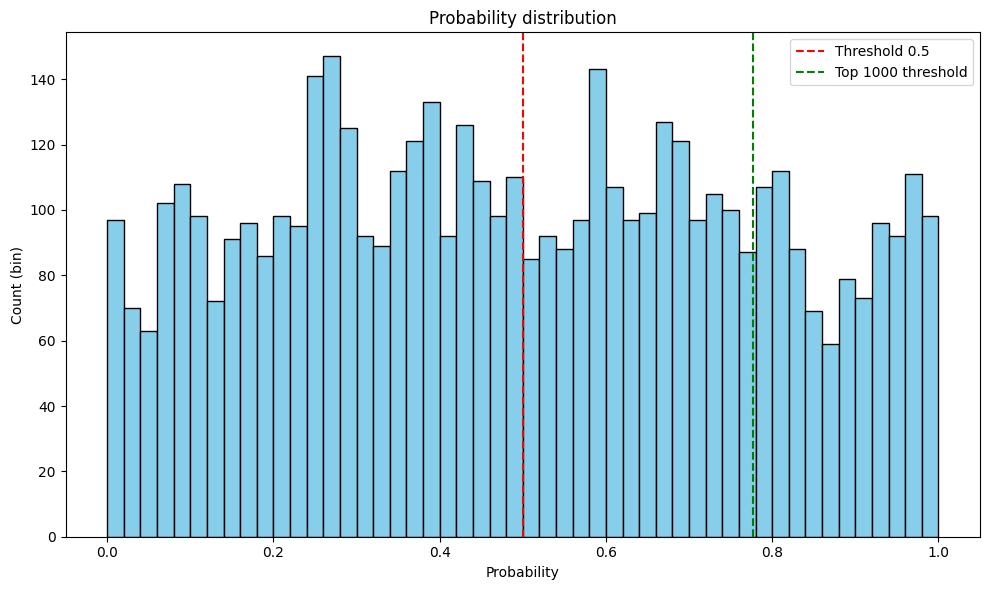

Random Forest: 7030.0000
   Parameters: {'clf__max_depth': 50, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}

   Metrics: {'score': np.float64(6980.0), 'acc_top': np.float64(0.718), 'acc_global': np.float64(0.65), 'logloss_top': 0.8850895219892323, 'logloss_global': 0.8015918150119515}

Testing: Gradient Boosting


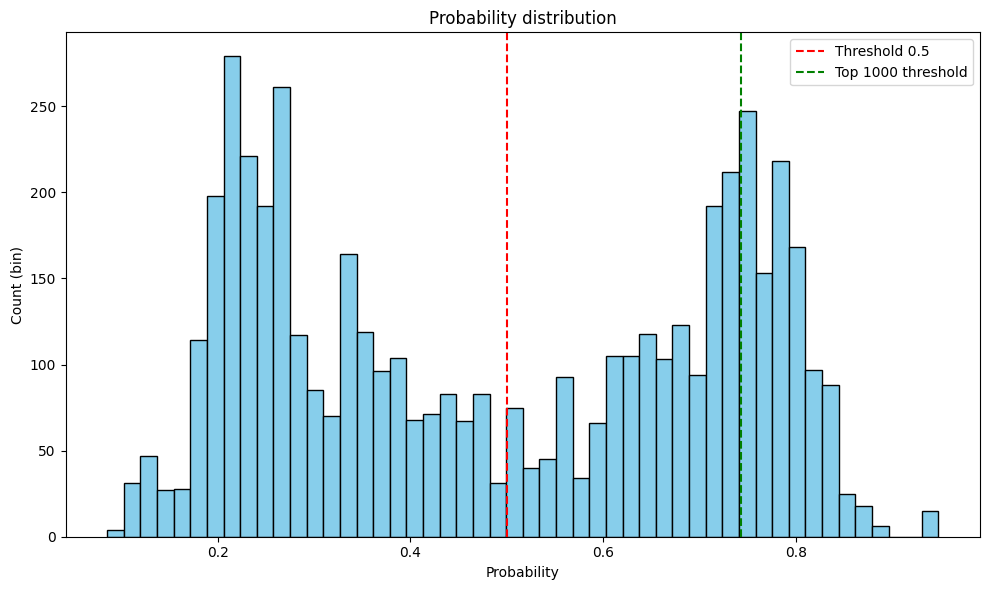

Gradient Boosting: 7110.0000
   Parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__subsample': 0.8}

   Metrics: {'score': np.float64(7080.0), 'acc_top': np.float64(0.728), 'acc_global': np.float64(0.6896), 'logloss_top': 0.6118148129731287, 'logloss_global': 0.6214653098387605}

Testing: XGBoost


/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:12:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


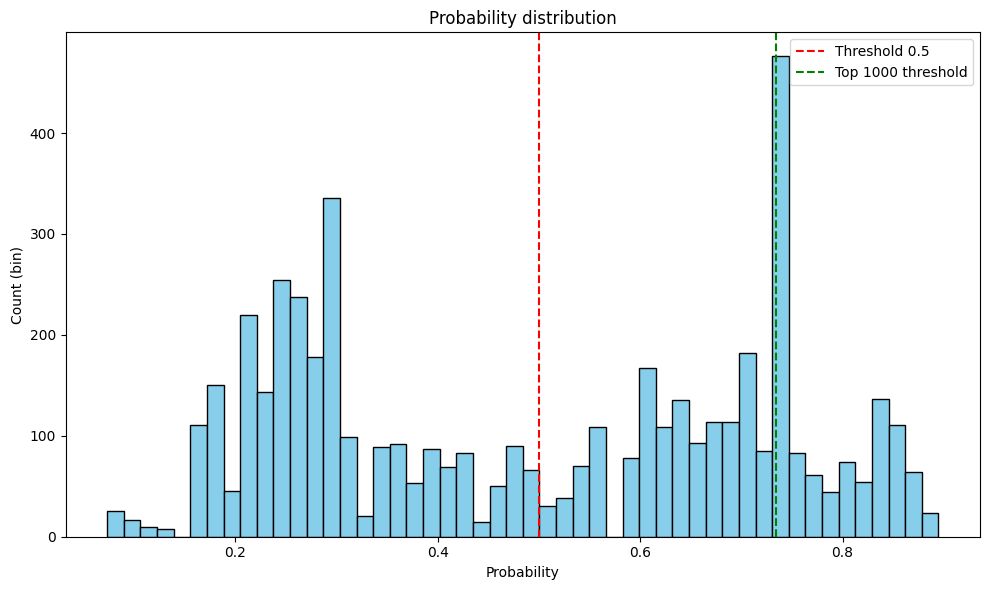

XGBoost: 7080.0000
   Parameters: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200, 'clf__subsample': 1.0}

   Metrics: {'score': np.float64(7040.0), 'acc_top': np.float64(0.724), 'acc_global': np.float64(0.6964), 'logloss_top': 0.6070977706547318, 'logloss_global': 0.6133398198568242}

Testing: SVC


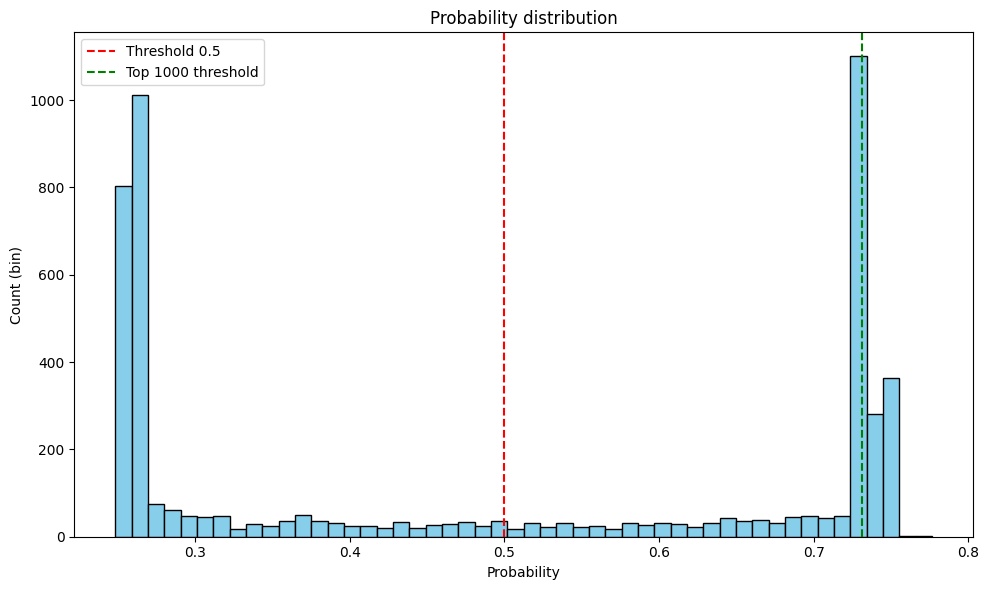

SVC: 7350.0000
   Parameters: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}

   Metrics: {'score': np.float64(7280.0), 'acc_top': np.float64(0.748), 'acc_global': np.float64(0.7064), 'logloss_top': 0.5647717740270196, 'logloss_global': 0.5958355428949585}

Testing: KNN


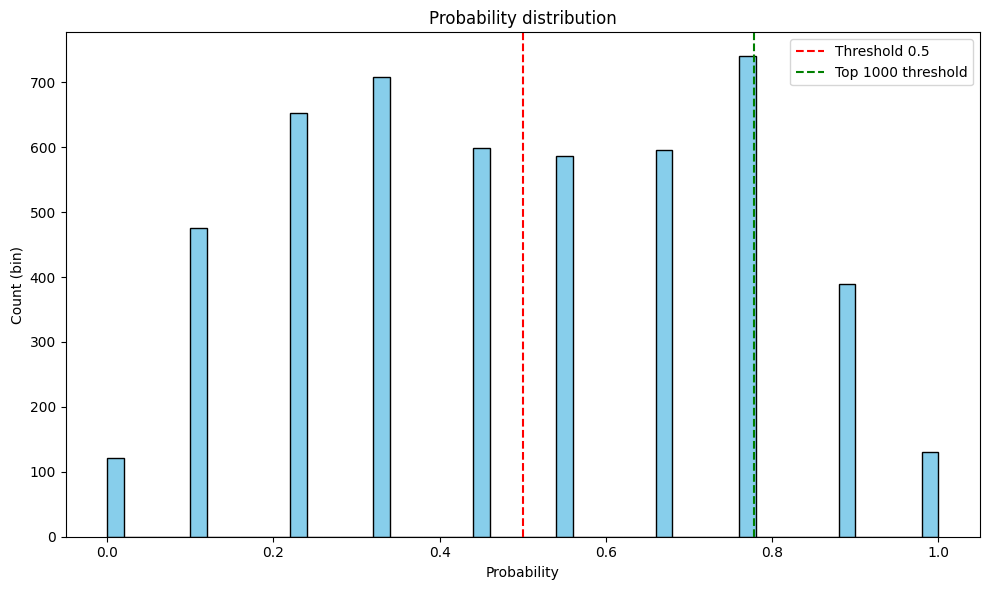

KNN: 7010.0000
   Parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 9, 'clf__weights': 'uniform'}

   Metrics: {'score': np.float64(7140.0), 'acc_top': np.float64(0.734), 'acc_global': np.float64(0.6688), 'logloss_top': 1.8114502002183048, 'logloss_global': 1.1693485509212957}

Testing: Naive Bayes


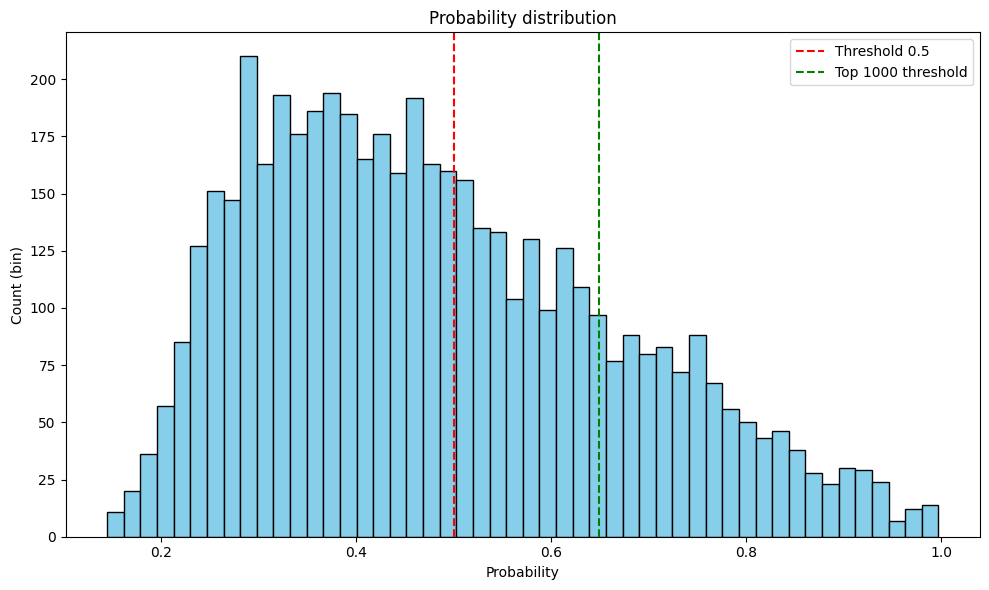

Naive Bayes: 7050.0000
   Parameters: {}

   Metrics: {'score': np.float64(7090.0), 'acc_top': np.float64(0.729), 'acc_global': np.float64(0.698), 'logloss_top': 0.6358065721695996, 'logloss_global': 0.6217698451017597}

Testing: AdaBoost


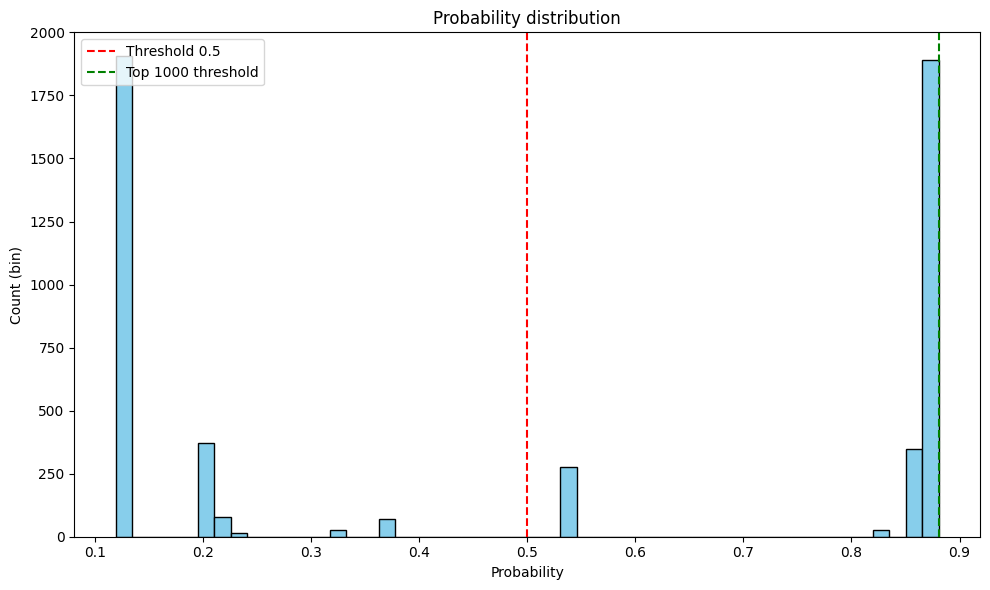

AdaBoost: 7200.0000
   Parameters: {'clf__learning_rate': 0.01, 'clf__n_estimators': 100}

   Metrics: {'score': np.float64(7170.0), 'acc_top': np.float64(0.737), 'acc_global': np.float64(0.706), 'logloss_top': 0.6529280110429722, 'logloss_global': 0.6760676396327752}



In [58]:
selected = [2]

X_k = X[:, selected]
X_test_k = X_test[:, selected]


results = []
for name, (model, param_grid) in models_params.items():
    print(f"Testing: {name}")
    best_model, best_score, best_params, metrics = evaluate_model_with_gridsearch(
        model, param_grid, X_k, y, X_test_k, n_splits=5, num_features=len(selected), top_k=1000
    )
    results.append((name, best_score, best_params, metrics))
    print(f"{name}: {best_score:.4f}")
    print(f"   Parameters: {best_params}\n")
    print(f"   Metrics: {metrics}\n")

#### features = [2. 6]

Testing: Logistic Regression


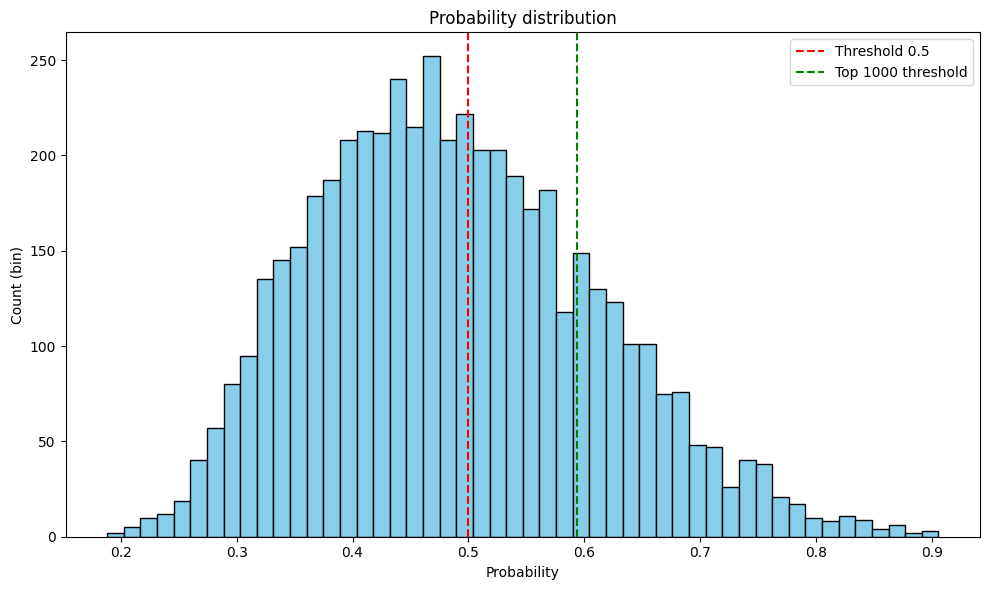

Logistic Regression: 6920.0000
   Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

   Metrics: {'score': np.float64(6900.0), 'acc_top': np.float64(0.73), 'acc_global': np.float64(0.6972), 'logloss_top': 0.6020299996557076, 'logloss_global': 0.6306739060700297}

Testing: Random Forest


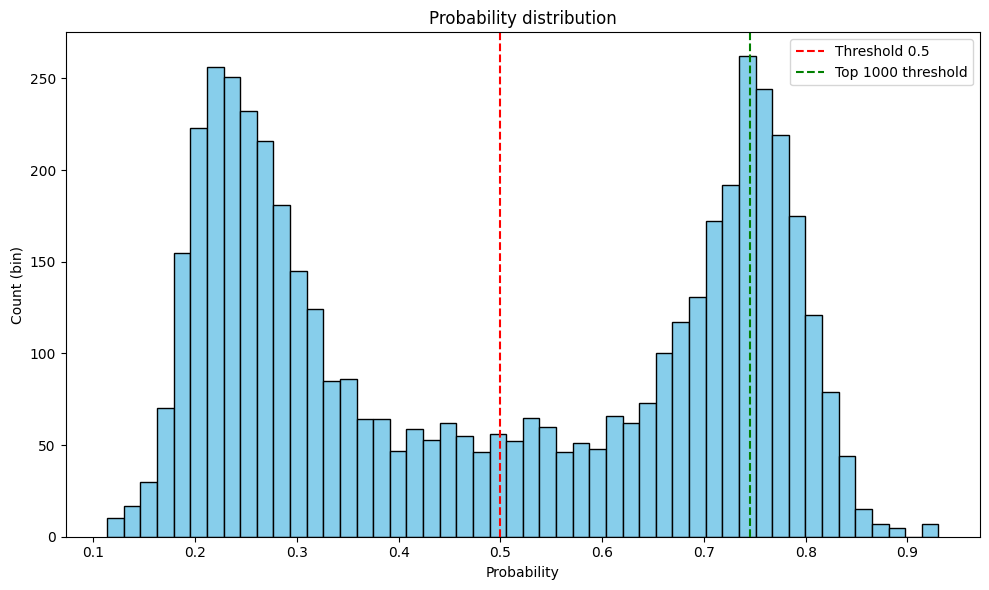

Random Forest: 7050.0000
   Parameters: {'clf__max_depth': 10, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}

   Metrics: {'score': np.float64(6910.0), 'acc_top': np.float64(0.731), 'acc_global': np.float64(0.6964), 'logloss_top': 0.5982125982480189, 'logloss_global': 0.6094006626615172}

Testing: Gradient Boosting


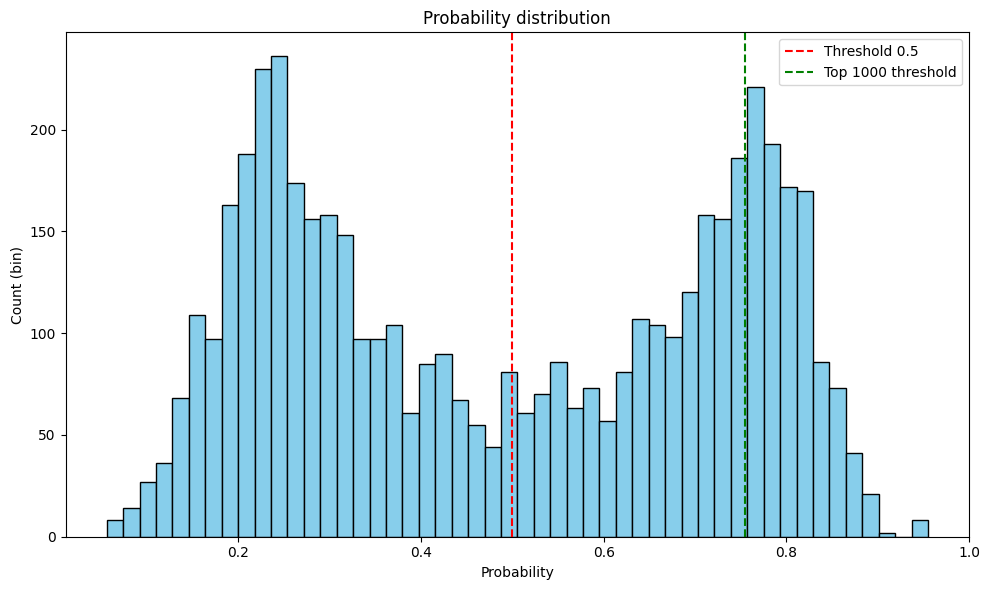

Gradient Boosting: 7100.0000
   Parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__subsample': 0.8}

   Metrics: {'score': np.float64(6880.0), 'acc_top': np.float64(0.728), 'acc_global': np.float64(0.6884), 'logloss_top': 0.6124178944844674, 'logloss_global': 0.6215713550922294}

Testing: XGBoost


/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:17:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


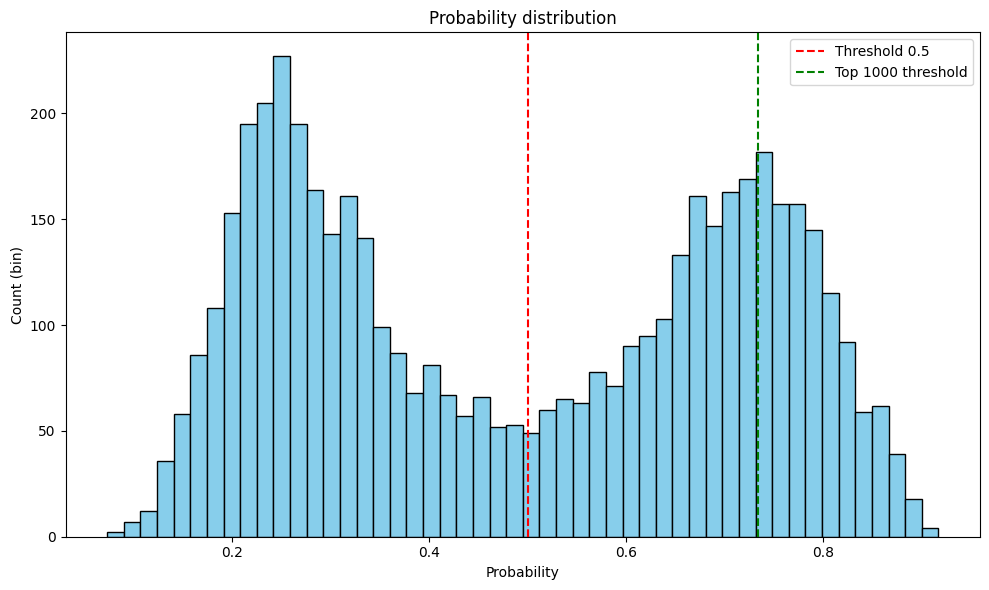

XGBoost: 7070.0000
   Parameters: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': 5, 'clf__n_estimators': 200, 'clf__subsample': 0.8}

   Metrics: {'score': np.float64(7020.0), 'acc_top': np.float64(0.742), 'acc_global': np.float64(0.6944), 'logloss_top': 0.5838681060195481, 'logloss_global': 0.6129540229687812}

Testing: SVC


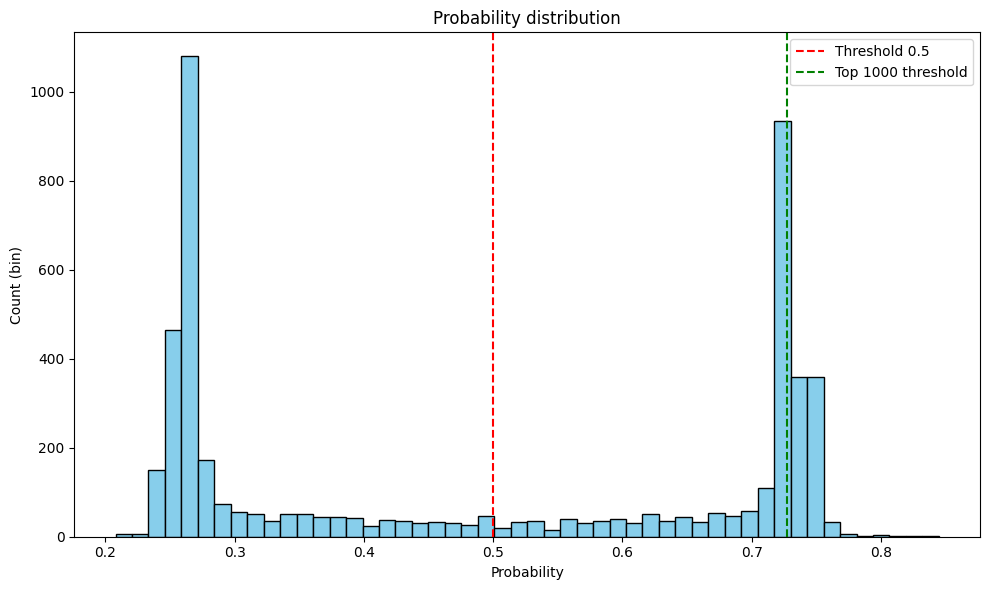

SVC: 7040.0000
   Parameters: {'clf__C': 100, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}

   Metrics: {'score': np.float64(6920.0), 'acc_top': np.float64(0.732), 'acc_global': np.float64(0.7044), 'logloss_top': 0.5834646469845478, 'logloss_global': 0.5985204405912027}

Testing: KNN


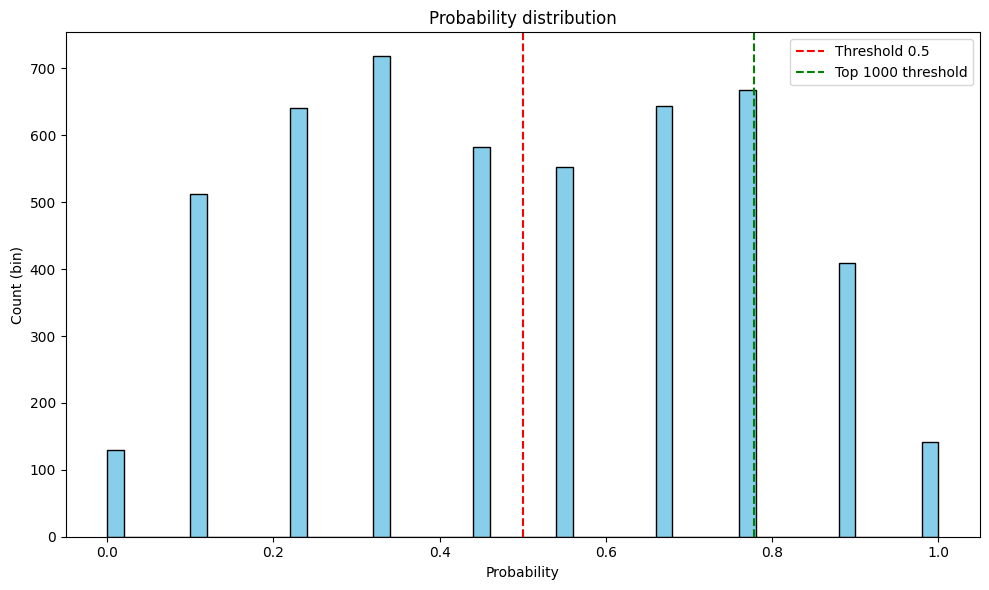

KNN: 6870.0000
   Parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 9, 'clf__weights': 'uniform'}

   Metrics: {'score': np.float64(6810.0), 'acc_top': np.float64(0.721), 'acc_global': np.float64(0.6702), 'logloss_top': 2.0255739326127564, 'logloss_global': 1.2249420579051011}

Testing: Naive Bayes


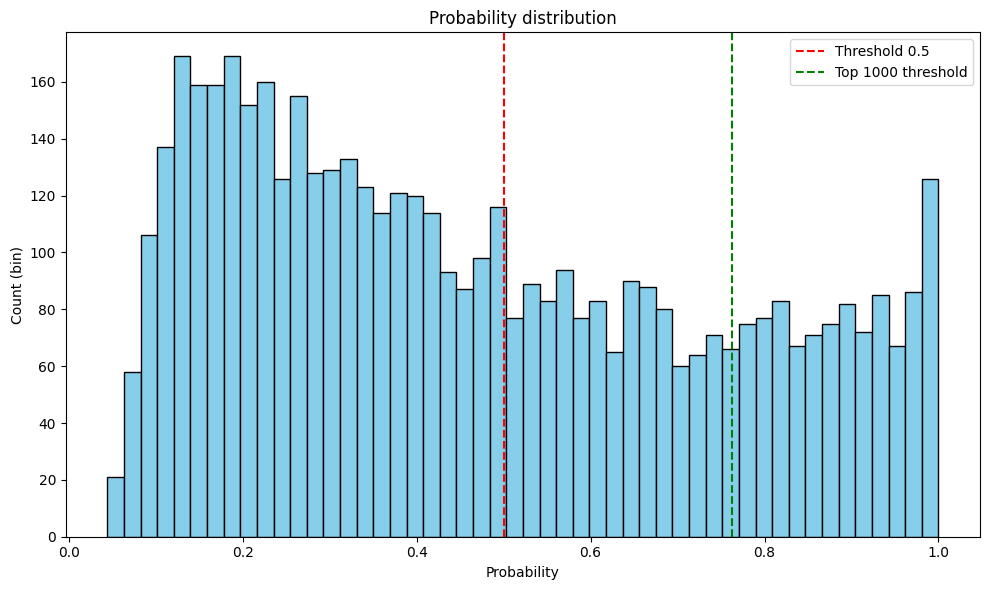

Naive Bayes: 6930.0000
   Parameters: {}

   Metrics: {'score': np.float64(6930.0), 'acc_top': np.float64(0.733), 'acc_global': np.float64(0.6946), 'logloss_top': 0.8370360253310235, 'logloss_global': 0.6677143940481918}

Testing: AdaBoost


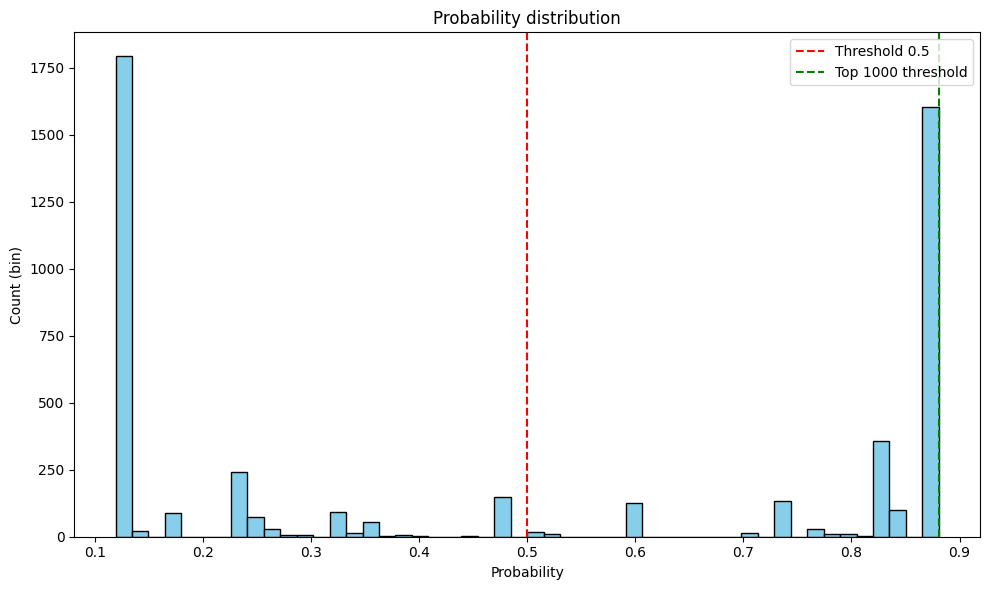

AdaBoost: 7090.0000
   Parameters: {'clf__learning_rate': 0.01, 'clf__n_estimators': 200}

   Metrics: {'score': np.float64(7020.0), 'acc_top': np.float64(0.742), 'acc_global': np.float64(0.7028), 'logloss_top': 0.6429280110429723, 'logloss_global': 0.6569937052216883}



In [59]:
selected = [2, 6]

X_k = X[:, selected]
X_test_k = X_test[:, selected]

results = []
for name, (model, param_grid) in models_params.items():
    print(f"Testing: {name}")
    best_model, best_score, best_params, metrics = evaluate_model_with_gridsearch(
        model, param_grid, X_k, y, X_test_k, n_splits=5, num_features=len(selected), top_k=1000
    )
    results.append((name, best_score, best_params, metrics))
    print(f"{name}: {best_score:.4f}")
    print(f"   Parameters: {best_params}\n")
    print(f"   Metrics: {metrics}\n")

#### features = [2, 3, 6]

Testing: Logistic Regression


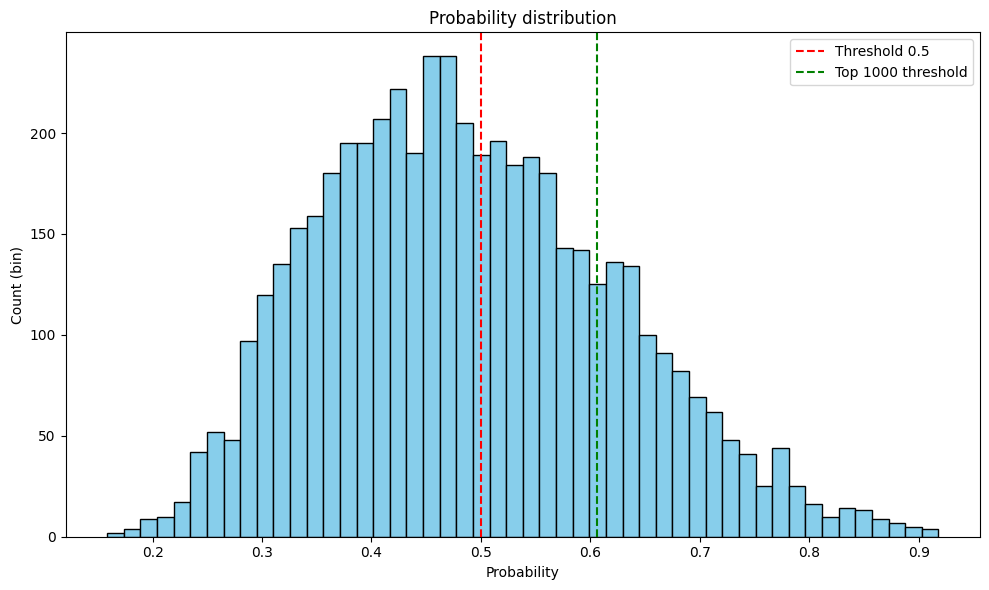

Logistic Regression: 6680.0000
   Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

   Metrics: {'score': np.float64(6760.0), 'acc_top': np.float64(0.736), 'acc_global': np.float64(0.6904), 'logloss_top': 0.5966503736750294, 'logloss_global': 0.6280093366603583}

Testing: Random Forest


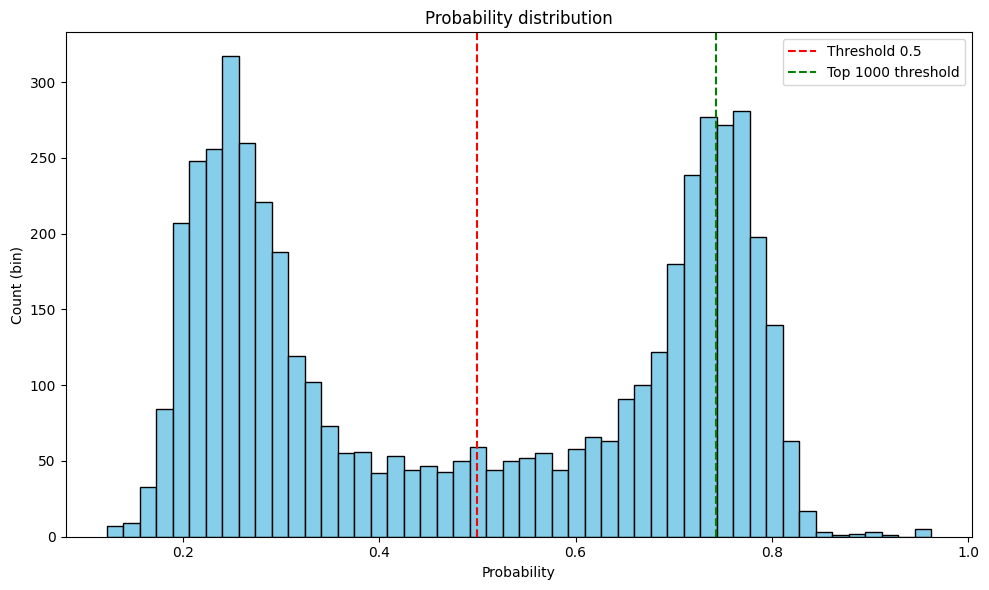

Random Forest: 6880.0000
   Parameters: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

   Metrics: {'score': np.float64(6740.0), 'acc_top': np.float64(0.734), 'acc_global': np.float64(0.7028), 'logloss_top': 0.5864473745972391, 'logloss_global': 0.6025164473130337}

Testing: Gradient Boosting


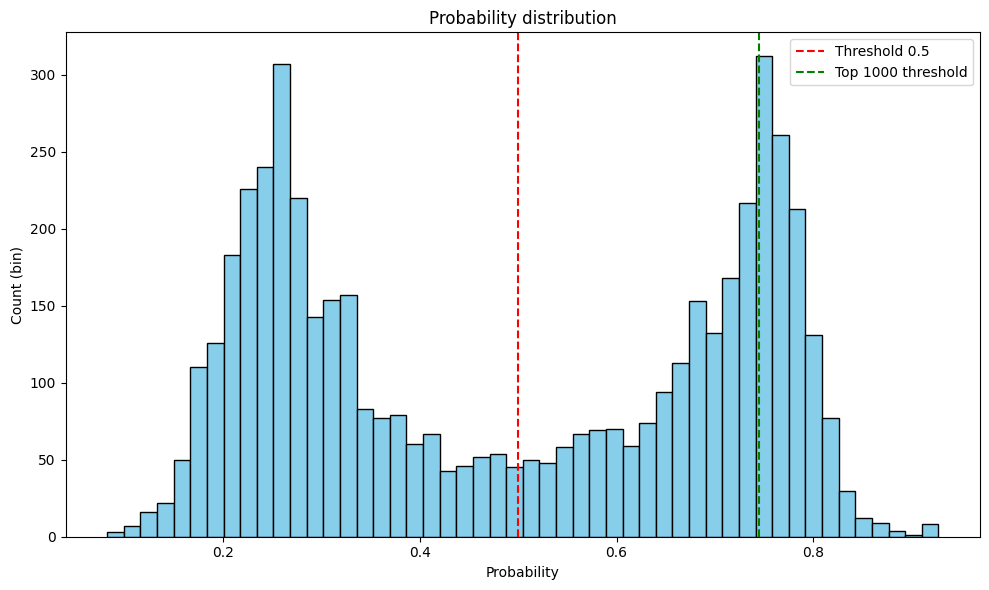

Gradient Boosting: 6860.0000
   Parameters: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__subsample': 0.8}

   Metrics: {'score': np.float64(6840.0), 'acc_top': np.float64(0.744), 'acc_global': np.float64(0.7006), 'logloss_top': 0.5777417700158167, 'logloss_global': 0.6042562580589078}

Testing: XGBoost


/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/tymek/mini/AML-projects/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:22:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


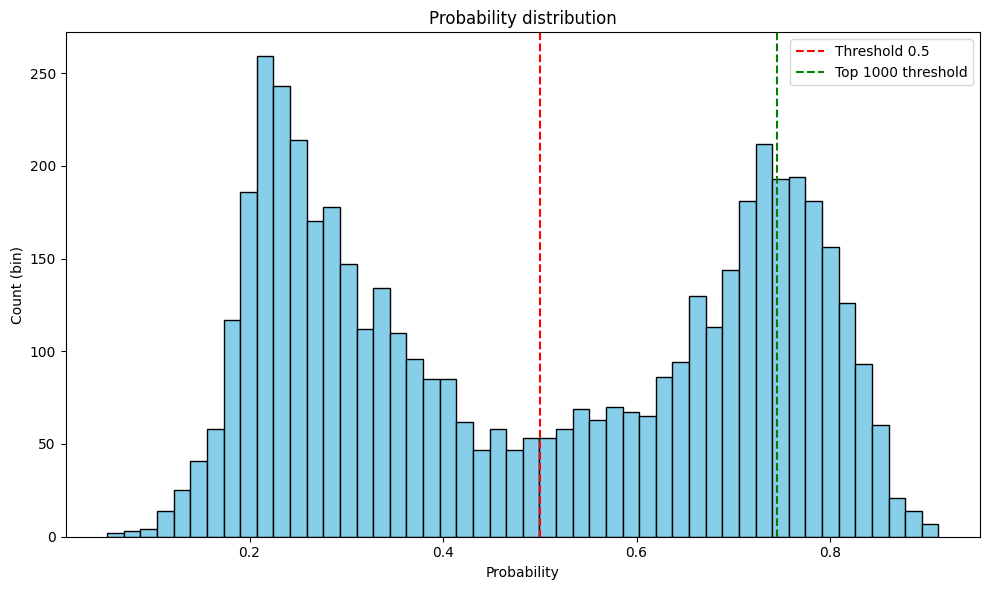

XGBoost: 6820.0000
   Parameters: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 200, 'clf__subsample': 0.8}

   Metrics: {'score': np.float64(6840.0), 'acc_top': np.float64(0.744), 'acc_global': np.float64(0.6998), 'logloss_top': 0.5797448369176444, 'logloss_global': 0.6066147568417698}

Testing: SVC


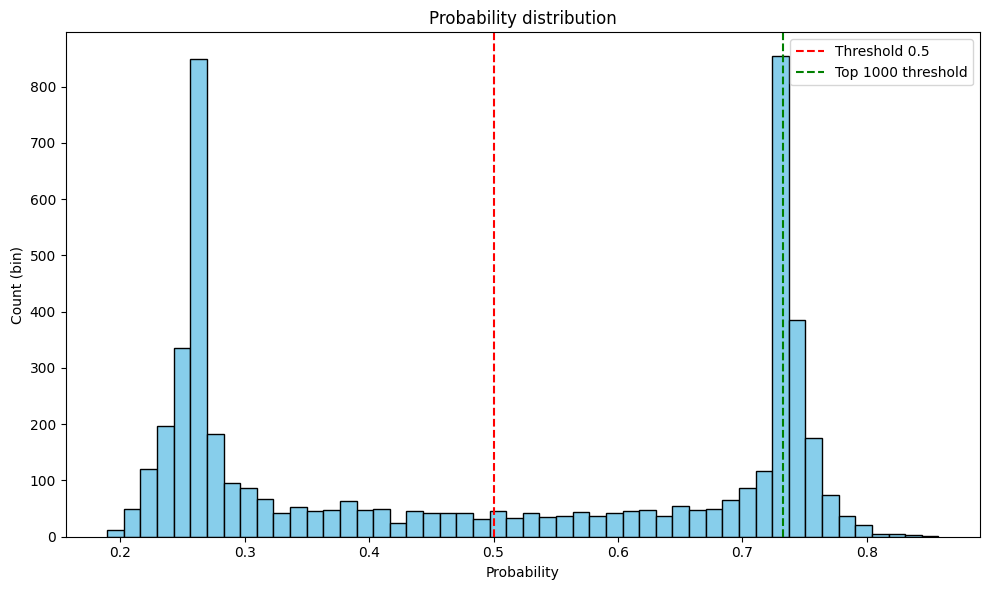

SVC: 6860.0000
   Parameters: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}

   Metrics: {'score': np.float64(6790.0), 'acc_top': np.float64(0.739), 'acc_global': np.float64(0.7078), 'logloss_top': 0.5759435913314992, 'logloss_global': 0.5951473180868535}

Testing: KNN


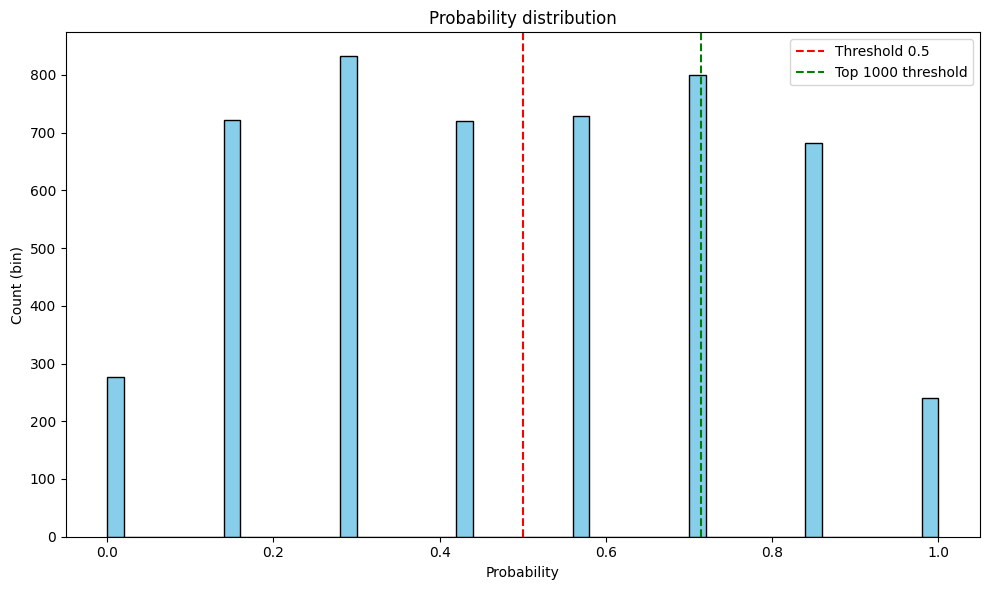

KNN: 6600.0000
   Parameters: {'clf__metric': 'manhattan', 'clf__n_neighbors': 7, 'clf__weights': 'uniform'}

   Metrics: {'score': np.float64(6500.0), 'acc_top': np.float64(0.71), 'acc_global': np.float64(0.6674), 'logloss_top': 3.052707744212501, 'logloss_global': 1.7034077955161104}

Testing: Naive Bayes


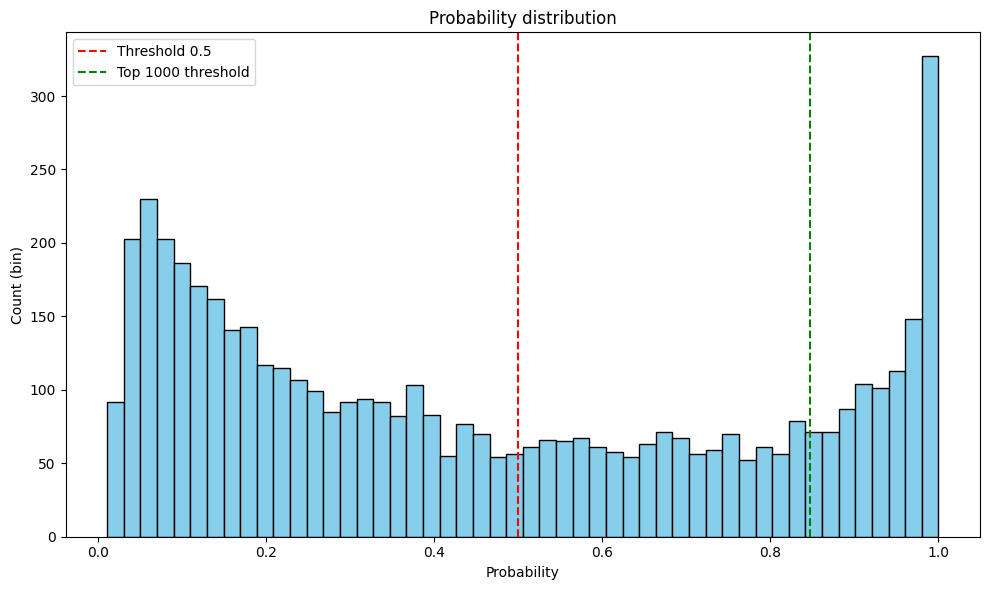

Naive Bayes: 6690.0000
   Parameters: {}

   Metrics: {'score': np.float64(6730.0), 'acc_top': np.float64(0.733), 'acc_global': np.float64(0.6872), 'logloss_top': 1.1240237365480297, 'logloss_global': 0.7646296000932129}

Testing: AdaBoost


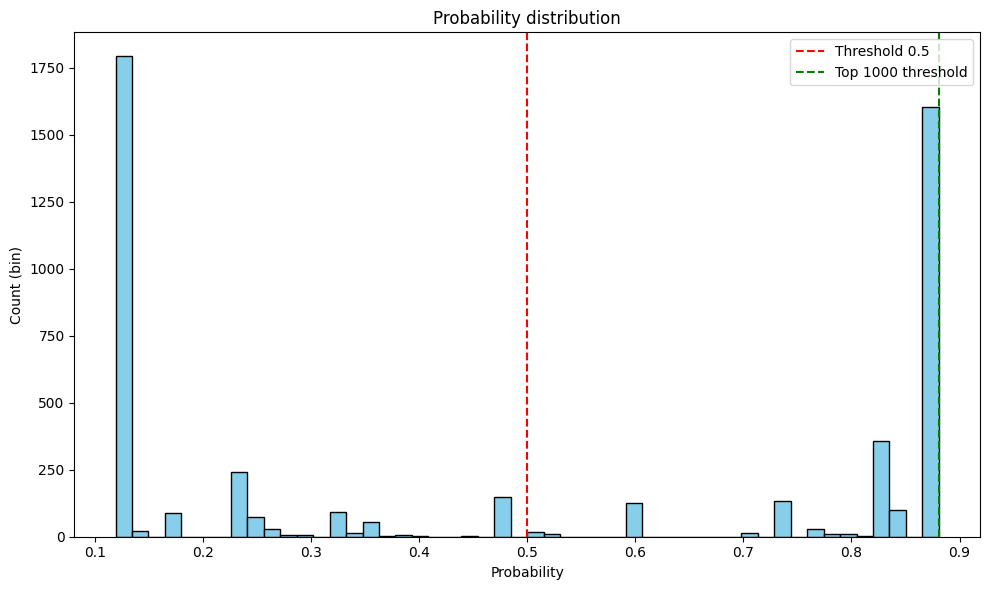

AdaBoost: 6890.0000
   Parameters: {'clf__learning_rate': 0.01, 'clf__n_estimators': 200}

   Metrics: {'score': np.float64(6820.0), 'acc_top': np.float64(0.742), 'acc_global': np.float64(0.7028), 'logloss_top': 0.6429280110429723, 'logloss_global': 0.6569937052216883}



In [60]:
selected = [2, 3, 6]

X_k = X[:, selected]
X_test_k = X_test[:, selected]

results = []
for name, (model, param_grid) in models_params.items():
    print(f"Testing: {name}")
    best_model, best_score, best_params, metrics = evaluate_model_with_gridsearch(
        model, param_grid, X_k, y, X_test_k, n_splits=5, num_features=len(selected), top_k=1000
    )
    results.append((name, best_score, best_params, metrics))
    print(f"{name}: {best_score:.4f}")
    print(f"   Parameters: {best_params}\n")
    print(f"   Metrics: {metrics}\n")